In [61]:
#Importing the necessary Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

In [62]:
#Loading the dataset
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

In [63]:
csv

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


In [64]:
#Checking whether the duplicates are present or not
duplicate = csv[csv.duplicated(['R', 'G', 'B'], keep='first')]
duplicate.head()

,color,color_name,hex,R,G,B
96,brown_web,Brown (Web),#a52a2a,165,42,42
146,cerulean,Cerulean,#007ba7,0,123,167
157,cherry,Cherry,#de3163,222,49,99
168,cinnamon,Cinnamon,#d2691e,210,105,30
172,cocoa_brown,Cocoa Brown,#d2691e,210,105,30


In [65]:
#100  instances/records are duplicated
duplicate.shape

(100, 6)

In [66]:
#Dropping the duplicate records
csv = csv.drop_duplicates(
  subset = ['R', 'G','B'],
  keep = 'first').reset_index(drop = True)

In [67]:
csv

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
760,yellow_ncs,Yellow (Ncs),#ffd300,255,211,0
761,yellow_orange,Yellow Orange,#ffae42,255,174,66
762,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
763,zaffre,Zaffre,#0014a8,0,20,168


In [68]:
#checking whether any of the attributes have null values or not
csv.isnull().sum()

color         0
color_name    0
hex           0
R             0
G             0
B             0
dtype: int64

In [69]:
#converting the dataframe into array type and also we are extracting the RGB values
colors=np.array(csv)
rgb=np.array(csv)[:,-3:]

In [70]:
print(colors)

[['air_force_blue_raf' 'Air Force Blue (Raf)' '#5d8aa8' 93 138 168]
 ['air_force_blue_usaf' 'Air Force Blue (Usaf)' '#00308f' 0 48 143]
 ['air_superiority_blue' 'Air Superiority Blue' '#72a0c1' 114 160 193]
 ...
 ['yellow_ryb' 'Yellow (Ryb)' '#fefe33' 254 254 51]
 ['zaffre' 'Zaffre' '#0014a8' 0 20 168]
 ['zinnwaldite_brown' 'Zinnwaldite Brown' '#2c1608' 44 22 8]]


In [71]:
print(rgb)

[[93 138 168]
 [0 48 143]
 [114 160 193]
 ...
 [254 254 51]
 [0 20 168]
 [44 22 8]]


In [72]:
#Building the model using KMeans CLustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=130, init="k-means++", random_state=5)
model.fit(rgb)

#Get the cluster label for each color
color_label = model.labels_

In [73]:
#printing the labels/cluster it belongs to that classified for each color
print(color_label)

[ 52   4  33  24  86  43  38 100  43   7  70  62  55  14  86  68 113  83
  45  72  80  20  28 106  53 126  95  90  59 107  96  40  61  73  34  86
  18  18   2  11  20  56  83  61  61  50   5  45  24 100  53  36  60 123
  22  69  53  45   5  98  88 100 116  15  34  33  11  11  91  66  34 128
 119  30  77  11 100   8  97 102  34  94 121  11  21  23 121  25  28  23
 122  30  30  69  38   0   2  10 115  22  83  82 110  36   0  12 102 112
  52  15  97  51   8  40   5  53  69  76  68   2  61  40  84  30 120  27
  96 118  47 111  43  62  71  96  18  87 124  15  37  91 117  88  98 121
  93  58  33  91  43   5  20 126 108  92  21   2  60 105 113  96   0  38
  89  61  43   7  39   4  77  88 107  49  15  38  19   5  60   5  84  36
  43  77  29  98  45  45   2  45 111 111 120  75  56 104  77  57  47 128
   5  60  44 112  38  15  69  49  69  82  53  35 114  49 125  70 119  33
  64  55  96  30   4 102  47 107  27  76  22  66 126  97 101  89  60  41
  16  99  97  13  74  24  43   3  93  60  77  55  4

In [74]:
#Get hex code from R,G,B values
def findhex(R,G,B):
  for i in range(len(colors)):
    if(colors[i,3]==R and colors[i,4]==G and colors[i,5]==B):
      return colors[i,2]

#Get color name from R,G,B values
def findname(R,G,B):
  for i in range(len(colors)):
    if(colors[i,3]==R and colors[i,4]==G and colors[i,5]==B):
      return colors[i,1]

In [75]:
#Plot the colors of a cluster as subplots
def show(f):
  n=int(len(f)/4)
  if(len(f)%4!=0):
    n=n+1
  k=0
  for i in range(n):
    for j in range(4):       
       ax = plt.subplot2grid((n,4), (i,j), colspan=1, rowspan=1)
       plt.subplots_adjust(hspace=0.8)
       ax.title.set_text("\n".join(textwrap.wrap(findname(f[k,0],f[k,1],f[k,2]),12)))
       ax.set_facecolor(findhex(f[k,0],f[k,1],f[k,2]))
       ax.set_yticklabels([])      
       ax.set_xticklabels([])
       k=k+1
       if(k==len(f)):
         return
  plt.show()

In [76]:
#Show nth Cluster
def getCluster(n):
    clstr = rgb[color_label==n-1]
    show(clstr)

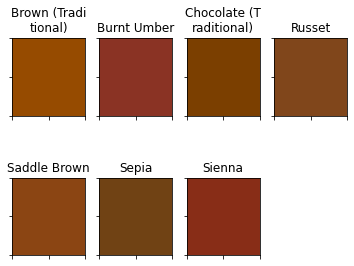

In [77]:
getCluster(1)

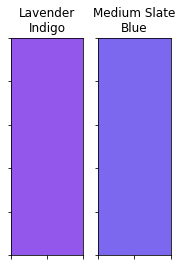

In [78]:
getCluster(2)

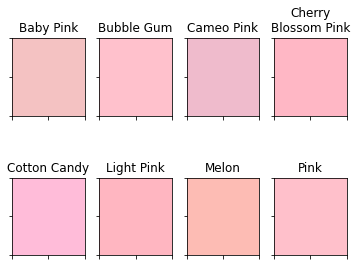

In [79]:
getCluster(3)

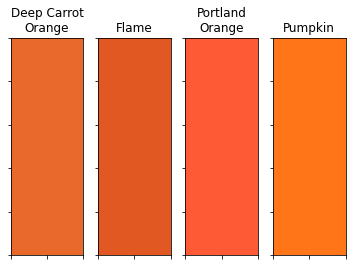

In [80]:
getCluster(4)

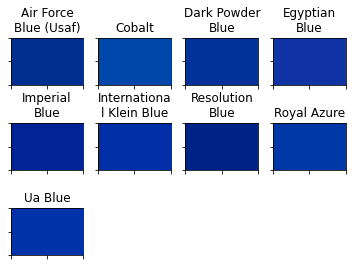

In [81]:
getCluster(5)

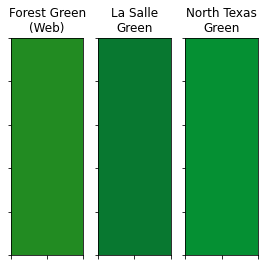

In [82]:
getCluster(10)

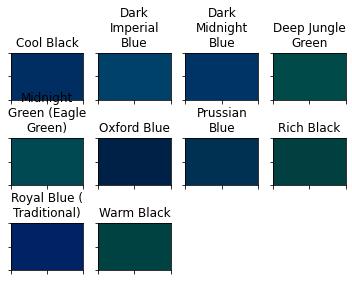

In [83]:
getCluster(50)

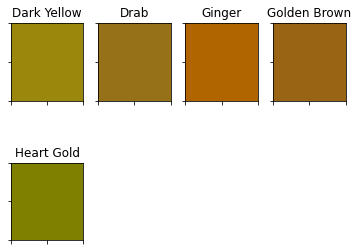

In [84]:
getCluster(100)

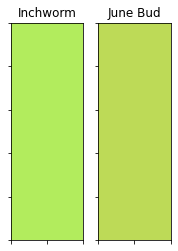

In [85]:
getCluster(130)

In [86]:
#Reading the image with opencv
img = cv2.imread('D:/6th semester/ML TH/test_image.jpg')

#declaring global variables
clicked = False
r = g = b = xpos = ypos = 0

In [87]:
#function to calculate minimum Manhattan distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [88]:
#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [89]:
#text the color above the image
cv2.namedWindow('image')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.setMouseCallback('image',draw_function)

while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (975,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = 'Color : ' + getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.9,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.9,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Exit the program when ESC key is pressed    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()